<a href="https://colab.research.google.com/github/DaffaFathir/Machine-Learning-Task/blob/main/Tugas%203/Data.Iris_kNN_Daffa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Daffa Fathir Fajri
NIM : 1103213149
Lecture : 3
Model : Decision Tree
Dataset : Iris

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None
   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa
kNN Accuracy: 0.9333333333333333


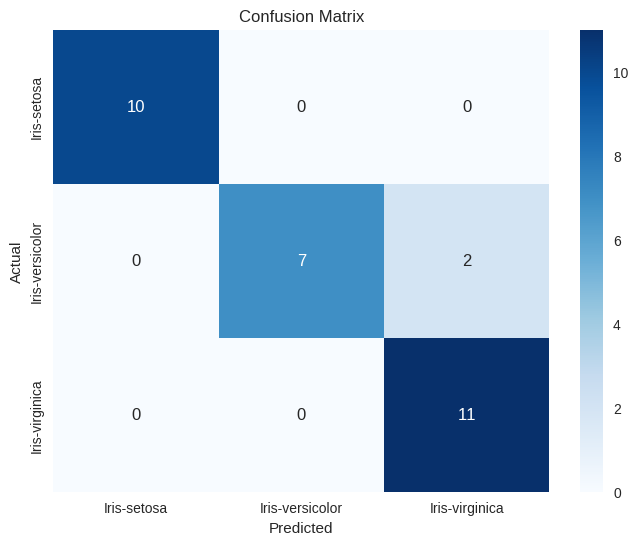

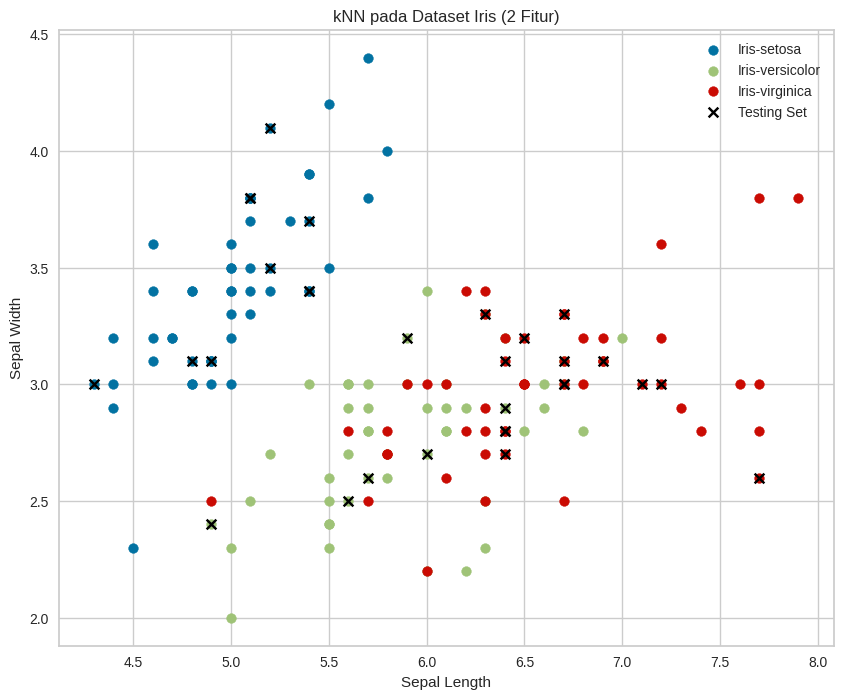

In [31]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Mengambil dataset Iris dari file CSV
# Pastikan Anda telah mengunggah file 'iris_data.csv' ke Google Colab
iris_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/iris.data.csv')

# Menampilkan informasi dasar tentang dataset (opsional)
print(iris_data.info())

# Menampilkan beberapa baris pertama dari dataset (opsional)
print(iris_data.head())

# Pisahkan fitur (X) dan label (y)
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
X = iris_data.drop('class', axis=1)  # Fitur adalah semua kolom kecuali kolom label
y = iris_data['class']  # Label adalah kolom 'species'

# Bagi dataset menjadi training set dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model kNN dengan k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Melatih model kNN menggunakan training set
knn_classifier.fit(X_train, y_train)

# Lakukan prediksi pada testing set
knn_predictions = knn_classifier.predict(X_test)

# Hitung akurasi model kNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("kNN Accuracy:", knn_accuracy)

# Import library yang diperlukan
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Hitung Confusion Matrix
conf_matrix = confusion_matrix(y_test, knn_predictions)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualisasi kNN pada dataset Iris yang memiliki 2 fitur (panjang dan lebar kelopak)
plt.figure(figsize=(10, 8))

# Plot setiap kelas pada dataset
for class_name in iris_data['class'].unique():
    plt.scatter(X[y == class_name]['sepal_length'], X[y == class_name]['sepal_width'], label=class_name)

# Plot titik-titik untuk testing set
plt.scatter(X_test['sepal_length'], X_test['sepal_width'], marker='x', color='black', label='Testing Set')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('kNN pada Dataset Iris (2 Fitur)')
plt.legend()
plt.show()